In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

C:\Users\Ancajima\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  del sys.path[0]


<IPython.core.display.Javascript object>


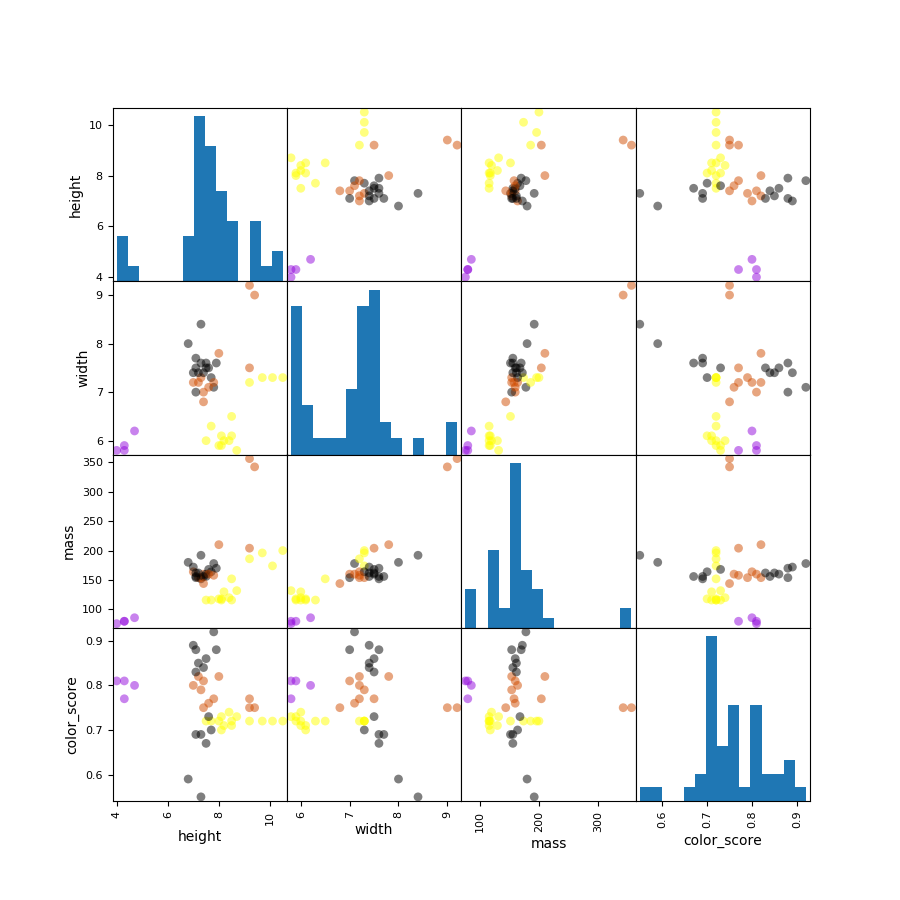

In [4]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
""" 
Para scatter_matrix param marker es un str, s indica el tamaño del punto de dispersión
figsize(tamaño vertical, tamaño horizontal), param cmap para el juego de colores
"""
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


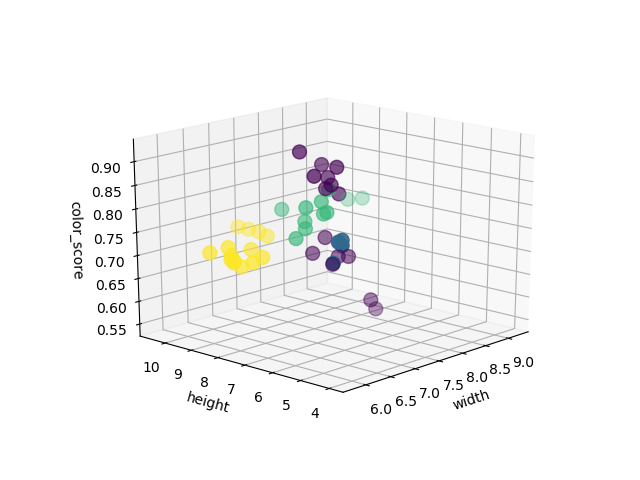

In [11]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

#### Dividiendo entrenamiento y test

In [12]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Identificar el mejor nivel de aprendizaje por K-NN

<IPython.core.display.Javascript object>


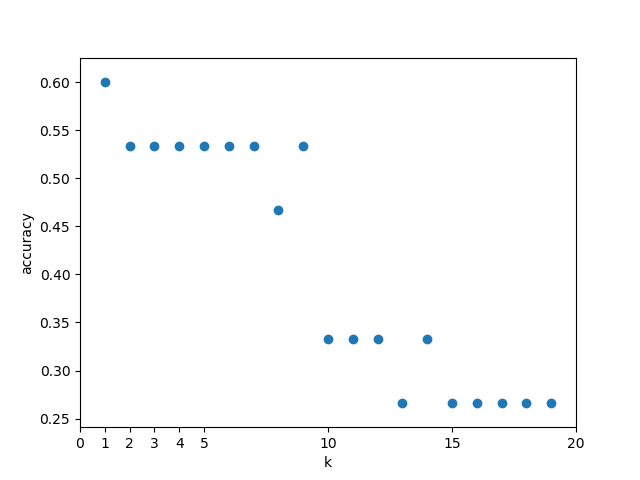

In [46]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,1,2,3,4,5,10,15,20]);

#### Clasificando modelo

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5)

#### Entrene al clasificador (ajuste el estimador) usando los datos de entrenamiento

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Estimar la precisión del clasificador en datos futuros, utilizando los datos de prueba

In [37]:
knn.score(X_test, y_test)

0.53333333333333333

#### Probando el modelo clasificador K-NN con objetos nuevos nunca antes vistos

In [39]:
#para parámetros knn.predict: 20 es peso en g, 4.3 ancho en cm, 5.5 altura en cm
fruit_prediction = knn.predict([[20,4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [41]:
#otro ejemplo probando el modelo: 
fruit_prediction = knn.predict([[1050,20,15]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

#### Graficando los límites de decisión del clasificador k-NN

<IPython.core.display.Javascript object>


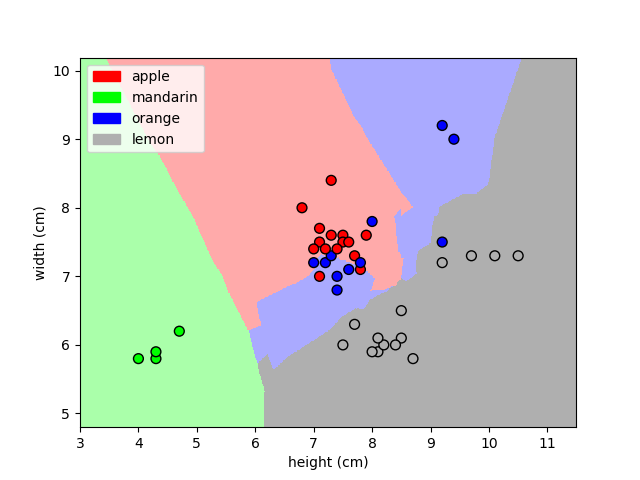

In [44]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 5, 'uniform')

#### Relación entre % de datos de entrenamiento y nivel de aprendizaje

<IPython.core.display.Javascript object>


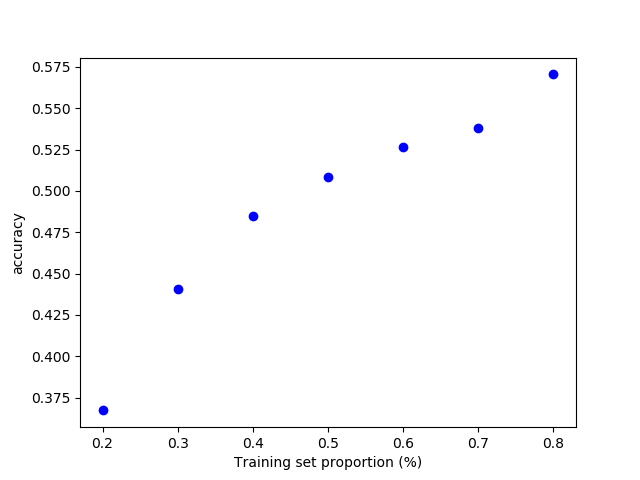

In [47]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');